<a href="https://colab.research.google.com/github/dayeong9/dayeong9/blob/main/%ED%86%B5%EA%B3%84%EC%97%B0%EC%8A%B5(%EA%B2%80%EC%A0%95part).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 딕셔너리를 사용하여 데이터 프레임 생성
data = {
    '결과': ['전환', '전환되지 않음'],
    '가격A': [200,23539],
    '가격B': [182,22406]
}

df = pd.DataFrame(data)
print(df)

        결과    가격A    가격B
0       전환    200    182
1  전환되지 않음  23539  22406


In [12]:
web=pd.read_csv('web_page_data.csv')
print(web)

      Page  Time
0   Page A  0.21
1   Page B  2.53
2   Page A  0.35
3   Page B  0.71
4   Page A  0.67
5   Page B  0.85
6   Page A  2.11
7   Page B  2.46
8   Page A  1.32
9   Page B  1.49
10  Page A  0.68
11  Page B  0.75
12  Page A  3.21
13  Page B  3.33
14  Page A  1.47
15  Page B  1.87
16  Page A  0.95
17  Page B  1.26
18  Page A  0.45
19  Page B  0.48
20  Page A  1.18
21  Page B  1.47
22  Page A  3.42
23  Page B  3.57
24  Page A  1.97
25  Page B  2.23
26  Page A  0.39
27  Page B  0.43
28  Page A  0.65
29  Page B  0.87
30  Page A  1.73
31  Page A  0.74
32  Page A  0.86
33  Page A  1.18
34  Page A  2.06
35  Page A  0.93


In [14]:
web.groupby('Page').describe()

Time                                                   
       count      mean       std   min   25%   50%    75%   max
Page                                                           
Page A  21.0  1.263333  0.884632  0.21  0.67  0.95  1.730  3.42
Page B  15.0  1.620000  1.011364  0.43  0.80  1.47  2.345  3.57

Text(0.5, 0.98, '')

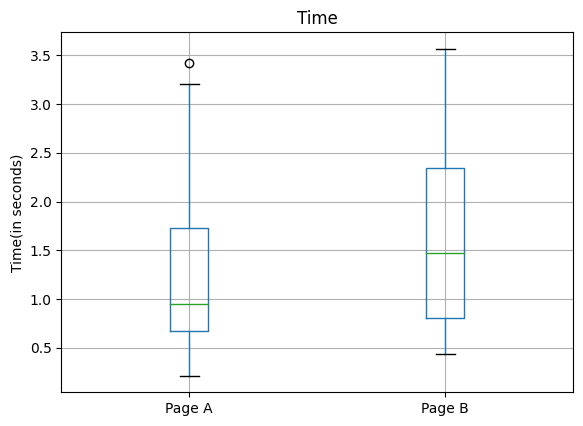

In [22]:
ax=web.boxplot(by='Page',column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time(in seconds)')
plt.suptitle('')

In [23]:
mean_a=web[web.Page =='Page A'].Time.mean()
mean_b=web[web.Page =='Page B'].Time.mean()
mean_b-mean_a

0.3566666666666669

In [33]:
#순열검정
import random

def perm_fun(x,nA,nB):                              #함수정의
    n=nA+nB                                         #x데이터프레임의 크기
    idx_B = set(random.sample(range(n),nB))         #랜덤샘플링 집합 B(크기 : nB) (비복원추출)
    idx_A = set(range(n))-idx_B                     #n에서 B제외 집합 A
    return x.loc[idx_B].mean()-x.loc[idx_A].mean()  #집합 A와 B 평균 차이

<ipython-input-33-7d6078e3f91b>:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()  #집합 A와 B 평균 차이
<ipython-input-33-7d6078e3f91b>:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()  #집합 A와 B 평균 차이
<ipython-input-33-7d6078e3f91b>:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()  #집합 A와 B 평균 차이
<ipython-input-33-7d6078e3f91b>:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()  #집합 A와 B 평균 차이
<ipython-input-33-7d6078e3f91b>:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


Text(0, 0.5, 'Frequency')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fi

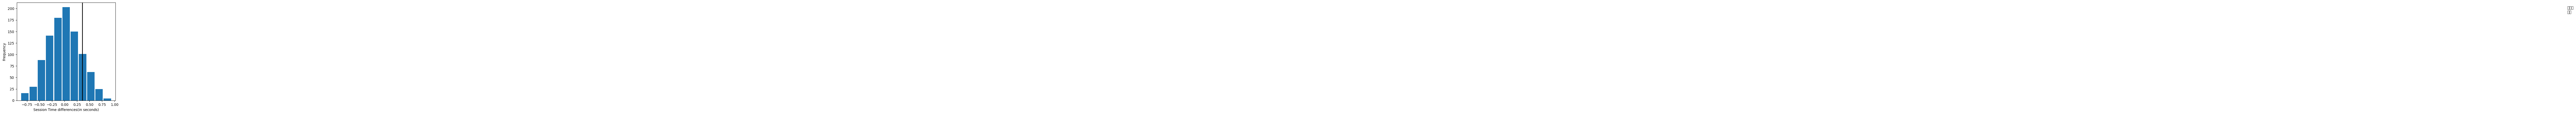

In [34]:

# nA와 nB 정의
nA = 21
nB = 15

#순열검정 히스토그램 표시

perm_diffs=[perm_fun(web.Time,nA,nB) for _ in range(1000)]
fig,ax = plt.subplots(figsize=(5,5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=mean_b - mean_a, color='black',lw=2)
ax.text(x=50, y=190, s='관측값\n차이', bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))
ax.set_xlabel('Session Time differences(in seconds)')
ax.set_ylabel('Frequency')

In [37]:
np.mean(np.array(perm_diffs > (mean_b - mean_a)))

0.146

Observed difference:0.0368%


<ipython-input-33-7d6078e3f91b>:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()  #집합 A와 B 평균 차이
<ipython-input-33-7d6078e3f91b>:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()  #집합 A와 B 평균 차이
<ipython-input-33-7d6078e3f91b>:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()  #집합 A와 B 평균 차이
<ipython-input-33-7d6078e3f91b>:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()  #집합 A와 B 평균 차이
<ipython-input-33-7d6078e3f91b>:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


Text(0, 0.5, 'Frequency')

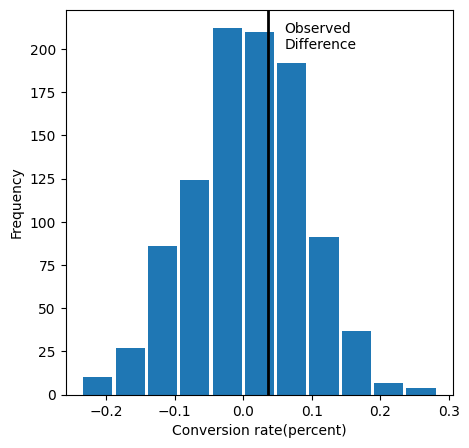

In [42]:
obs_pct_diff=100*(200/23739 - 182/22588) #A 전환율 - B전환율
print(f'Observed difference:{obs_pct_diff:.4f}%')

# 0이 45945개, 1이 382개인 리스트 생성 후 Pandas Series로 변환
conversion=[0]*45945
conversion.extend([1]*382)
conversion=pd.Series(conversion)

# 1000번의 순열 검정을 통한 변환율 차이 샘플링
perm_diffs=[100*perm_fun(conversion,23739,22588)
            for _ in range(1000)]

fig,ax = plt.subplots(figsize=(5,5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\nDifference', bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))
ax.set_xlabel('Conversion rate(percent)')
ax.set_ylabel('Frequency')

In [45]:
#정규근사법(가설 이항분포이므로 가능)으로 p값 구하기

from scipy.stats import chi2_contingency

survivors=np.array([[200,23739-200],[182,22588-182]])
chi2, p_value, df, _ =chi2_contingency(survivors)

print(f'p-value for single sided test : {p_value/2: .4f}')

p-value for single sided test :  0.3498


In [ ]:
res=